#Modo de treinamento Holdout utilizando o *Iris Dataset*


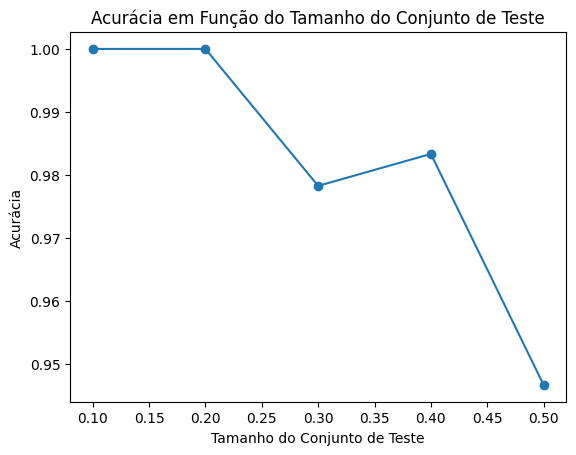

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Definindo a faixa de valores para o test_size
test_size_values = np.arange(0.1, 0.6, 0.1)

# Lista para armazenar as acurácias
accuracies = []

# Loop sobre os diferentes tamanhos de teste
for test_size in test_size_values:
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    # Instanciando o KNeighborsClassifier
    knn = KNeighborsClassifier(metric='euclidean')
    knn.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = knn.predict(X_test)

    # Calculando a acurácia e armazenando na lista
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotando os resultados
plt.plot(test_size_values, accuracies, marker='o')
plt.title('Acurácia em Função do Tamanho do Conjunto de Teste')
plt.xlabel('Tamanho do Conjunto de Teste')
plt.ylabel('Acurácia')
plt.show()


#Modo de treinamento CV ( K-fold ) utilizando o *Breast Cancer Wisconsin Dataset*

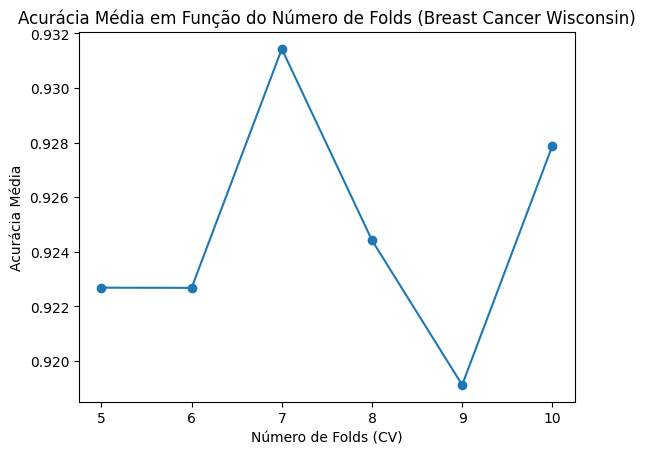

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from statistics import mean, stdev
from sklearn.datasets import load_breast_cancer


# Carregando o conjunto de dados Breast Cancer Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target

# Lista para armazenar as acurácias
mean_accuracies = []



# Variando o número de folds de 5 a 10
for n_folds in range(5, 11):
    # Configurando o objeto KFold
    skf = KFold(n_splits=n_folds, random_state=1, shuffle=True)

    # Instanciando um objeto KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

    # Calculando a acurácia usando cross-validation Kfold
    scores = cross_val_score(knn, X, y, scoring='accuracy', cv=skf)
    mean_accuracies.append(mean(scores))


# Plotando os resultados
plt.plot(range(5,11), mean_accuracies, marker='o')
plt.title('Acurácia Média em Função do Número de Folds (Breast Cancer Wisconsin)')
plt.xlabel('Número de Folds (CV)')
plt.ylabel('Acurácia Média')
plt.show()


#Matriz de confusão, Precision, Recall e F-Measure utilizando Pimas Indian Diabetes Database

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')

# Visualizando as colunas do nosso dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


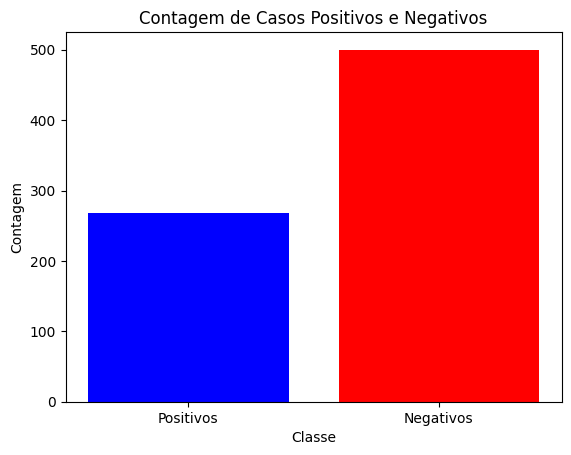

In [ ]:
# Contar a quantidade de instâncias positivas e negativas
positivos = diabetes[diabetes['Outcome'] == 1].shape[0]
negativos = diabetes[diabetes['Outcome'] == 0].shape[0]

plt.bar(['Positivos', 'Negativos'], [positivos, negativos], color=['blue', 'red'])
plt.title('Contagem de Casos Positivos e Negativos')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd

# Carregar o conjunto de dados diabetes de um arquivo CSV
diabetes = pd.read_csv('diabetes.csv')

# Selecionar características e variável classe
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de classificação (vamos usar RandomForest como exemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo resultados
print(f'Acurácia: {acc:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')




Acurácia: 0.75
Precisão: 0.64
Recall: 0.66
F1 Score: 0.65


In [ ]:
# Criar uma matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)


Matriz de Confusão:
[[121  30]
 [ 27  53]]


Essa é a matriz de confusão que vimos, contudo, ela é mais utilizado em formato de *heatmap* pois ajuda na visualização, veja:


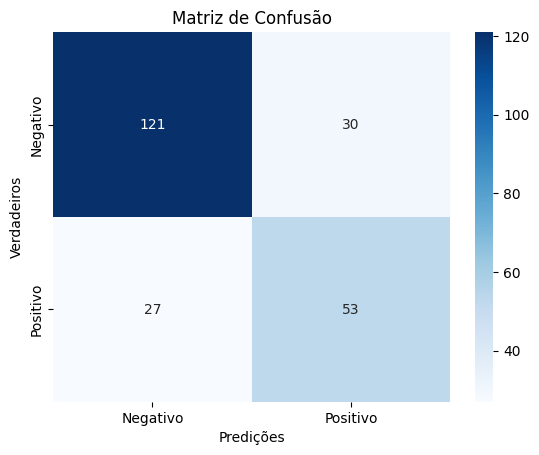

In [ ]:

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predições')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

Com a matriz de confusão em *heatmap* conseguimos ver mais claramente os Verdadeiros Negativos (Era negativo e o modelo previu negativo)- Canto superior esquerto - e os Verdadeiros Positivos (Era positivo e o modelo previu positivo) - Canto inferior direito. Abaixo dos VN temos os Falsos Negativos (Era positivo, mas o modelo previu negativo) e acima dos VP temos os Falsos Positivos (Era negativo, mas o modelo previu positivo)